In [1]:
import numpy as np
import matplotlib.pyplot  as  plt
import matplotlib.patches as patches
np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

In [2]:
gamm = 2
r = 0.2
value = np.linspace(0, 4, 400)

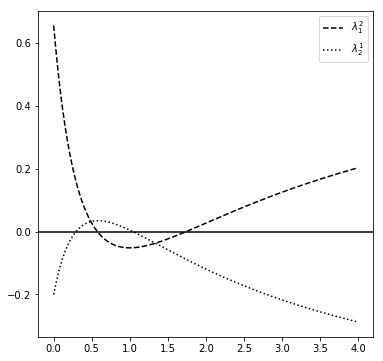

In [3]:
L21 = []
L12 = []
del_b = 0.2
del_v = 0.5
R0 = 2.5
a11 = -1
#a11 = 0
a12 = 0
a21 = 0
#a22 = 0
a22 = np.sqrt(4 - a11**2)
for t in value:
    l21 =  gamm/(2*(gamm + r))*(2*t*t + 3*t + 2)/((t + 1)**2)*del_v + (R0 - 1)*t/(t+1)**2*(t*(a21 - a12) + a21 - a22)  + del_b
    l12 = -gamm/(2*(gamm + r))*t*(2*t + 1)/((t + 1)**2)*del_v + (R0 - 1)*t/(t+1)**2*(t*(a12 - a21) + a12 - a11) - del_b
    L21.append(l21)
    L12.append(l12)
fig12, ax = plt.subplots(figsize = (6,6))
ax.plot(value, L21, 'k--', label = '$\lambda^2_1$')
ax.plot(value, L12, 'k:', label = '$\lambda^1_2$')
plt.legend(loc='best')
ax.axhline(y=0, color='k')

Text(-0.1, 1.1, 'b')

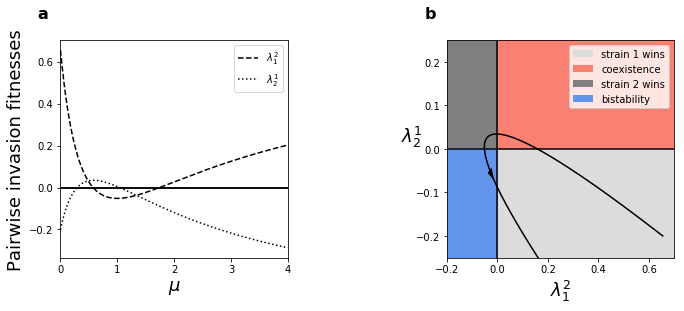

In [4]:
X = np.linspace(-0.2, 0.7, 500)
Y = np.linspace(0.3, -0.3, 500)
x, y =  np.meshgrid(X, Y)

pos1 = x > 0
pos2 = y > 0
neg1 = x < 0
neg2 = y < 0

coex = 0.5*pos1*pos2
bista = 2.5*neg1*neg2
s2 =   1.5*pos2*neg1
s1 = -0.5*pos1*neg2
scen = coex + s1 + s2 + bista


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,4))
fig.subplots_adjust(wspace = 0.7)

ax1.plot(value, L21, 'k--', label = '$\lambda^2_1$')
ax1.plot(value, L12, 'k:', label = '$\lambda^1_2$')
ax1.legend(loc='best')
ax1.axhline(y=0, color='k')
ax1.set_ylabel('Pairwise invasion fitnesses', fontsize = 18)
ax1.set_xlabel('$\\mu$', fontsize = 18)
ax1.set_xlim(0, 4)
ax1.axhline(color='k')
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, size=16, weight='bold')

ax2.plot(L21, L12, color='k')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.set_ylim(-0.25, 0.25)
ax2.arrow(L21[160], L12[160], L21[161]-L21[160], L12[161] - L12[160],shape='full', lw=0, length_includes_head=True, head_width = 0.02, color='k')
ax2.set_ylabel('$\\lambda^1_2$', fontsize = 18, rotation='horizontal')

colors = ['gainsboro', 'salmon', 'grey', 'cornflowerblue']
ax2.contourf(x, y, scen, levels = [-1, 0, 1, 2, 3], colors = colors)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in ax2.collections]
ax2.legend(proxy, ["strain 1 wins", "coexistence", "strain 2 wins", "bistability"])
ax2.set_xlabel('$\\lambda^2_1$', fontsize = 18)
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, size=16, weight='bold')

In [19]:
fig.savefig('4outcome')

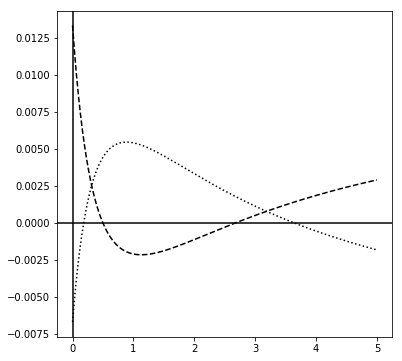

In [243]:
value = np.linspace(0, 5, 5000)
gamm = 1
r = 0.5
L21 = []
L12 = []
del_v = 0.165 #a
nu = np.array([[-0.16 , 0], #b
                 [0, 0.17]])
del_b = -0.1 #c

for t in value:
    l21 =  gamm/(2*(gamm + r))*(2*t*t + t)/((1 + t)**2)*del_v + gamm/(2*(gamm + r))*1/(1 + t)*2*nu[1,1] + del_b
    l12 = -gamm/(2*(gamm + r))*(2*t*t + t)/((1 + t)**2)*del_v + gamm/(2*(gamm + r))*1/(1 + t)*2*nu[0,0] - del_b
    L21.append(l21)
    L12.append(l12)
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(value, L21, 'k--', label = '$\lambda^2_1$')
ax.plot(value, L12, 'k:', label = '$\lambda^1_2$')
ax.axvline(x=0, color='k')
#ax.set_ylim(-1,1)
ax.axhline(y=0, color='k')